# Exploratory Data Analysis Project on Google Play Store

## I asked several questions and searched for an answer for them, using:

* Data reshaping and manipulation
* Data cleaning
* Data visualization

## Import relevant Python libraries

In [1]:
#import libraries and list the files in the input directory
import os
print(os.listdir("../input")) #list the docs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plotting interactive graphs
import random #to use in random choices
from datetime import datetime as dt #for date conversion
%matplotlib inline 
#to include graphs inline within the frontends next to code

['googleplaystore_user_reviews.csv', 'googleplaystore.csv', 'license.txt']


## Load data into a dataframe and observe initial rows

In [2]:
df = pd.read_csv("../input/googleplaystore.csv") #load googleplaystore data in a dataframe(df)
print(df.head()) #have a look at the first 5 columns

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

# First glance of Google Play Store data

In [3]:
print(df.shape) #gives number of rows and columns

(10841, 13)


In [4]:
print("Name of the columns are:", "\n", df.columns) #look at the column names

Name of the columns are: 
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [5]:
print("Dataframe has following datatypes:", "\n", df.dtypes) #look at the datatypes in the dataframe
print("Number of null values per column:", "\n", df.isnull().sum()) #look at # of null values per column

Dataframe has following datatypes: 
 App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
Number of null values per column: 
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [6]:
#look at the App name column if they have unique values
print("Statistics of App Column:", df["App"].describe().to_dict())

#drop NA values of the df:
df.dropna(axis=0, how='any', inplace=True)
print("After the clean-up:",df.shape)

Statistics of App Column: {'count': 10841, 'unique': 9660, 'top': 'ROBLOX', 'freq': 9}
After the clean-up: (9360, 13)


## Observations from the first glance
* None of the columns of the dataframe represents primary key
* Dataframe had some NA values, those values are dropped
* After the clean up data has 9360 rows and 13 columns
* Columns have mixed data types, we might convert some of them in the coming steps
/n E.g. Last Updated is not a date type



# 1) How the ratings of the Apps look like?

Text(0.5, 1.0, 'Distribution of App Ratings')

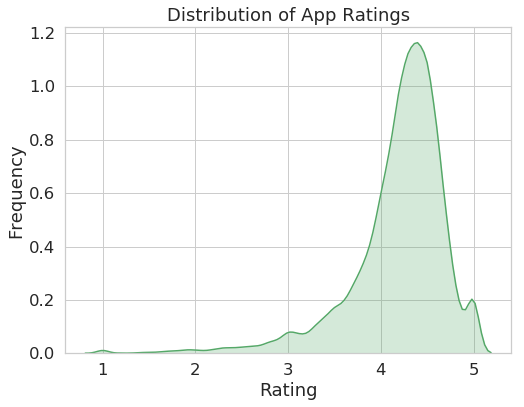

In [7]:
#look at the distribution of app ratings in a distplot
sns.set(font_scale=1.5, style = "whitegrid") #set the font size and background
f, axes = plt.subplots(figsize=(8,6), sharex=True) #set the plotsize

g = sns.distplot(df.Rating, hist=False, color="g", kde_kws={"shade": True})
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings")

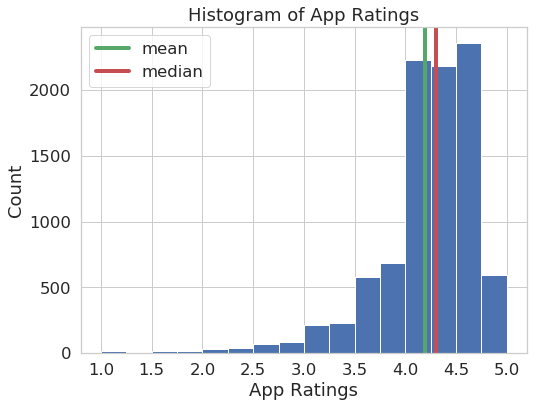

In [8]:
plt.figure(figsize=(8,6))
plt.hist(df.Rating, range=(1,5), bins=16)
plt.axvline(x=df.Rating.mean(), linewidth=4, color='g', label="mean")
plt.axvline(x=df.Rating.median(), linewidth=4, color='r', label="median")
plt.xlabel("App Ratings")
plt.ylabel("Count")
plt.title("Histogram of App Ratings")
plt.legend(["mean", "median"])
plt.show()

# 2) What is the average rating per category, how many apps are there in each category?


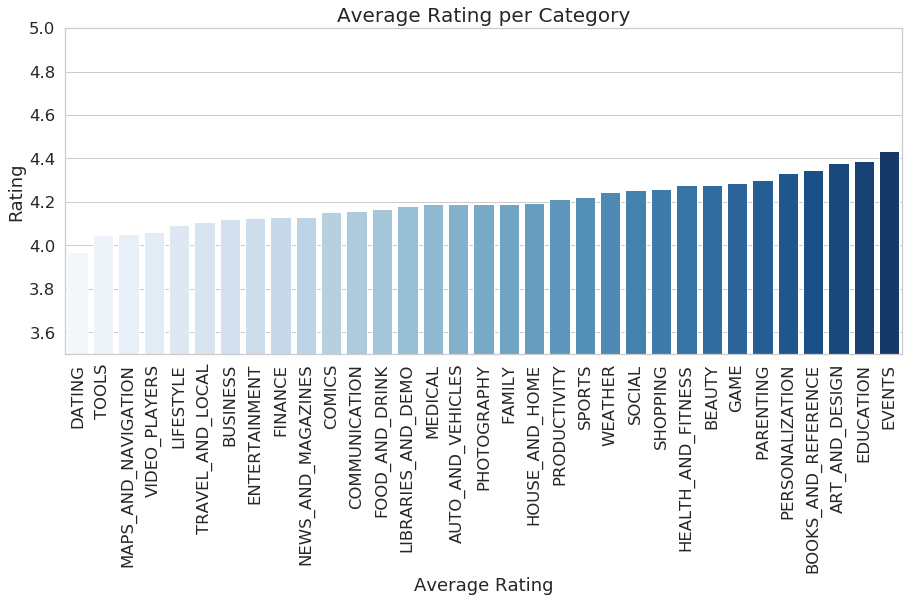

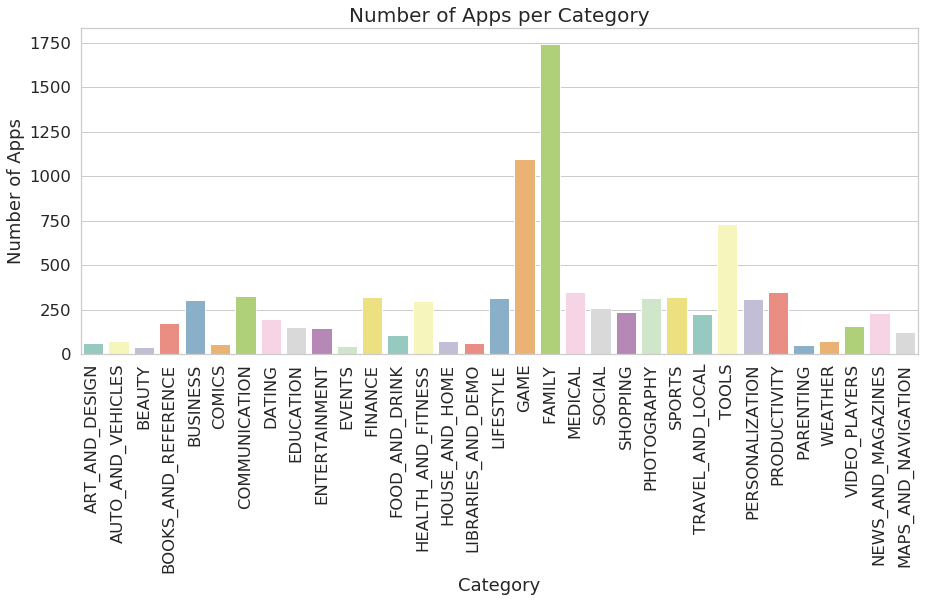

In [9]:
#look at the ratings per app category in a sequential order

#prepare data and sort
new_df = df.groupby("Category").Rating.mean().reset_index() #average ratings per category
sorted_df = new_df.sort_values(by=["Rating"], ascending=True)  #sort by rating in descending order

sns.set(font_scale=1.5, style="whitegrid")
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

#since we have categorical data in the x axis, we will look data with a barplot
ax = sns.barplot(x="Category", y="Rating", data=sorted_df, palette="Blues") 
for item in ax.get_xticklabels():
    item.set_rotation(90) #rotate every xticklabels for readability
ax.set(ylim=(3.5,5)) #zoom in y axes since values are distributed around 4
plt.xlabel("Average Rating")
plt.title("Average Rating per Category", size=20)

#look at the number of apps per category
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

#since we are going to count # of apps per each category we are going to use barplot
ax = sns.countplot(x="Category", data=df, palette="Set3")
plt.ylabel("Number of Apps")
plt.title("Number of Apps per Category", size=20)
for item in ax.get_xticklabels():
    item.set_rotation(90)

## Ratings - App Counts
* App ratings per categpory are distributed between 4.0 and 4.5
* Art_And_Design and Events category is having the least number of apps but they have the highest average rating
* Game and Family category apps have outnumbered the other apps

# 3) Business and Dating apps, is the average rating signifcantly different in each category?

## To answer this we are going to look at following conditions:
1. samples should be normally distributed
2. 2 populations standard deviations must be equal
3. Samples must be independent

Standard deviation of business app ratings: 0.6233904980479363
Standard deviation of dating app ratings: 0.6288915140858174


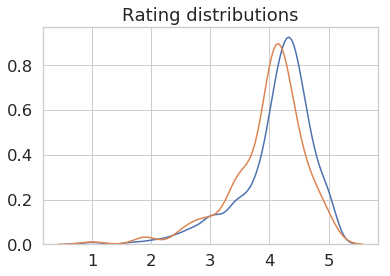

In [10]:
#load data into numpy arrays
business = list(df[df.Category == "BUSINESS"].Rating)
dating = list(df[df.Category == "DATING"].Rating)

# 1) samples should be normally distributed: two samples resembles normal distribution
sns.kdeplot(business)
sns.kdeplot(dating)
plt.title("Rating distributions")

# 2) 2 populations standard deviations must be equal: standard deviations are equal
business_array = np.asarray(business)
dating_array = np.asarray(dating)

print("Standard deviation of business app ratings:", business_array.std())
print("Standard deviation of dating app ratings:", dating_array.std())

# 3) two distributions are already independent from each other

In [11]:
from scipy.stats import ttest_ind #import statistics library to run the tests
#confidence interval: 95%
#setting confidence interval sets our alpha (treshold value) = 1-0.95 = 0.05

#Null Hypothesis: Difference in the mean rating of Business and Dating apps are due to a random chance
#Alternative Hypothesis: Mean rating of Business and Dating apps are significantly different

#p-value = when it is assumed that our null hypothesis is correct, p value gives us the probability of
#getting a sample with the results we assumed.

#run the 2 sample test:

_, pvalue = ttest_ind(business, dating)
if pvalue <= 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis") 

Reject Null Hypothesis


## Ratings of Business and Dating Apps
Since our p-value is less then our alpha(treshold) value, we are going to reject our null hypothesis concluding us, average rating of two categories are significantly different than each other.

# 4) If an app has high number of installs, does it mean that it gets the more reviews from the users?

In [12]:
#remember that # of reviews are in object dtype
df.Reviews = df.Reviews.apply(lambda x: int(x)) #convert object into int

#look at the total reviews per install category
total_reviews = df.groupby('Installs').Reviews.sum().reset_index()
sorted_total_reviews = total_reviews.sort_values(by='Reviews', ascending=False).reset_index(drop=True)
print(sorted_total_reviews.head(5))

         Installs     Reviews
0    100,000,000+  1910541071
1  1,000,000,000+  1237498538
2    500,000,000+   716931632
3     10,000,000+   453887077
4     50,000,000+   356117879


Text(0.5, 1.0, 'Distribution of Reviews for Popular Apps')

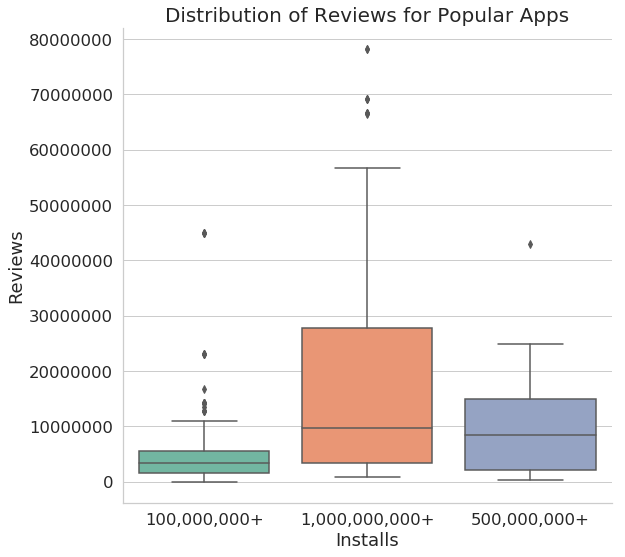

In [13]:
#look at the distribution of the reviews per top-review install category
#since this a distribution per categorical data boxplot will be plotted
g = sns.catplot(x="Installs",
                y="Reviews",
                data=df[(df.Installs == "1,000,000,000+") | (df.Installs == "500,000,000+") | 
                        (df.Installs == "100,000,000+")], 
                kind="box", height = 8 ,palette = "Set2")
plt.ticklabel_format(style='plain', axis='y')
#g.set_yticklabels(["0","10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M"])
plt.title("Distribution of Reviews for Popular Apps", size=20)

## Apps - Reviews
* Popular apps (apps having more than 100M installs) received more reviews in total
* 1,000,000,000+ apps have more ditributed reviews
* Apps downloaded more than 100M received more attention
* 100M+ apps have more apps having outlier reviews

Apps having reviews greater than 60M

In [14]:
print(df.App[df.Reviews>60000000].unique())

['WhatsApp Messenger' 'Facebook' 'Instagram']


# 5)  Does every popular app (Installs 100M+) receives a review from each download ? 
### Since we dont know the exact number of downloads this will be an approximate answer



In [15]:
#we are going to look the ratio of installs to review per app

df['Int_installs'] = df.Installs.replace(to_replace = ['\,','\+'], value=['',''], regex=True) 
#create new column, remove special characters for integer conversion

df.Int_installs = df.Int_installs.astype('int64') 
#change data type from string to integer

df['Review_to_Install_Ratio'] = df.Reviews / df.Int_installs

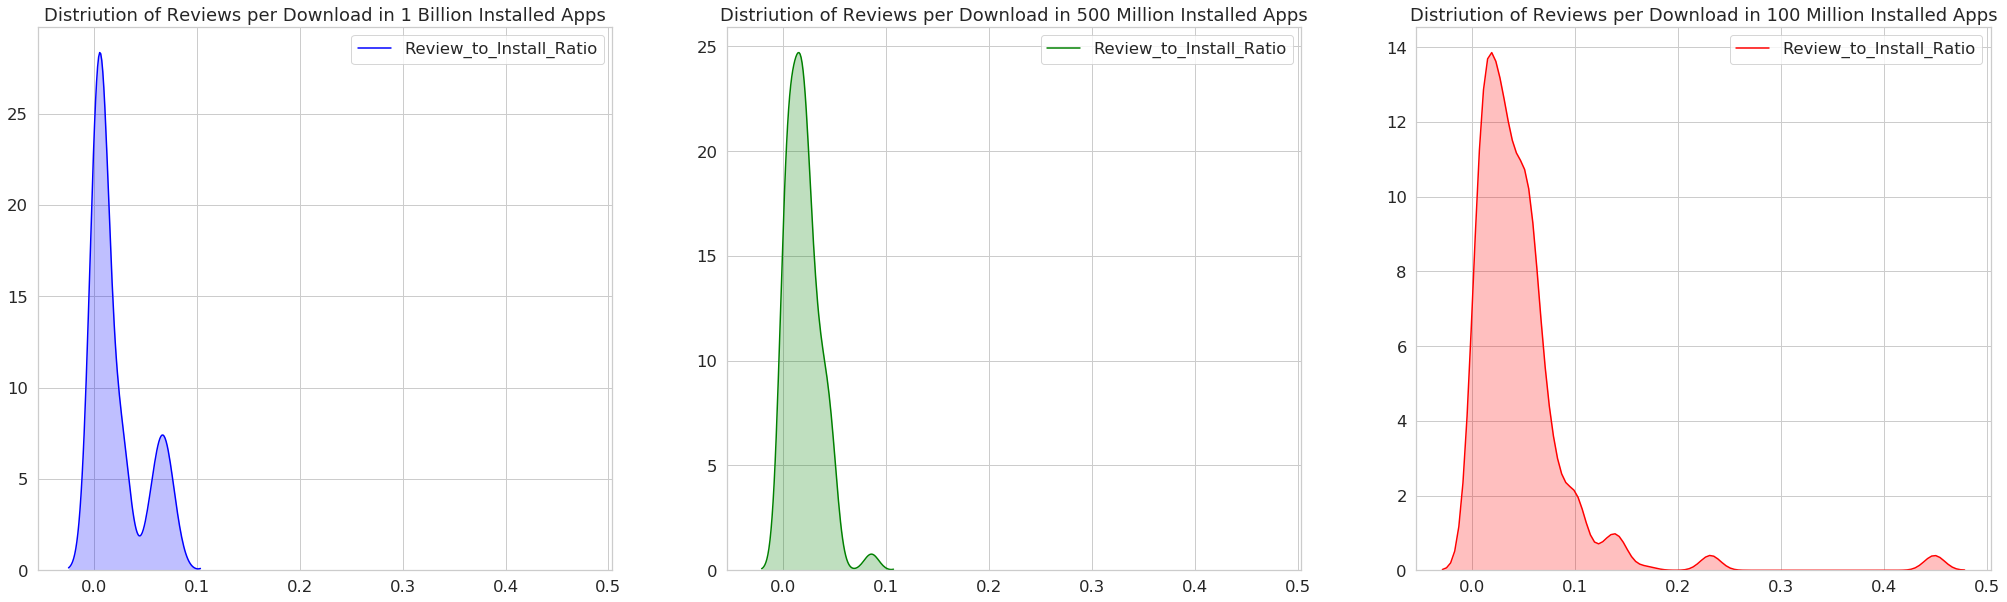

In [16]:
#then plot the distribution per each popular install category
f, axes = plt.subplots(1, 3, figsize=(35, 10), sharex=True) #set the plotsize, divide plot into 3 columns

g1 = sns.kdeplot(df.Review_to_Install_Ratio[df.Installs == "1,000,000,000+"], shade=True, ax=axes[0], color="blue")
g1.title.set_text("Distriution of Reviews per Download in 1 Billion Installed Apps")

g2 = sns.kdeplot(df.Review_to_Install_Ratio[df.Installs == "500,000,000+"], shade=True, ax=axes[1], color="green")
g2.title.set_text("Distriution of Reviews per Download in 500 Million Installed Apps")

g3 = sns.kdeplot(df.Review_to_Install_Ratio[df.Installs == "100,000,000+"], shade=True, ax=axes[2],color="red")
g3.title.set_text("Distriution of Reviews per Download in 100 Million Installed Apps")

## Reviews - Installs for popular apps
* Since the distribution is concantrated around 0, we cannot conclude that every downloader leaves a review for a popular app
* In the 100 Million Install Category, there are more reviews per download compared to other categories

# 6) What is the distribution of rating per number of installs and type (paid or free) ?

Text(0.5, 1.0, 'Ratings per Type and Install Category')

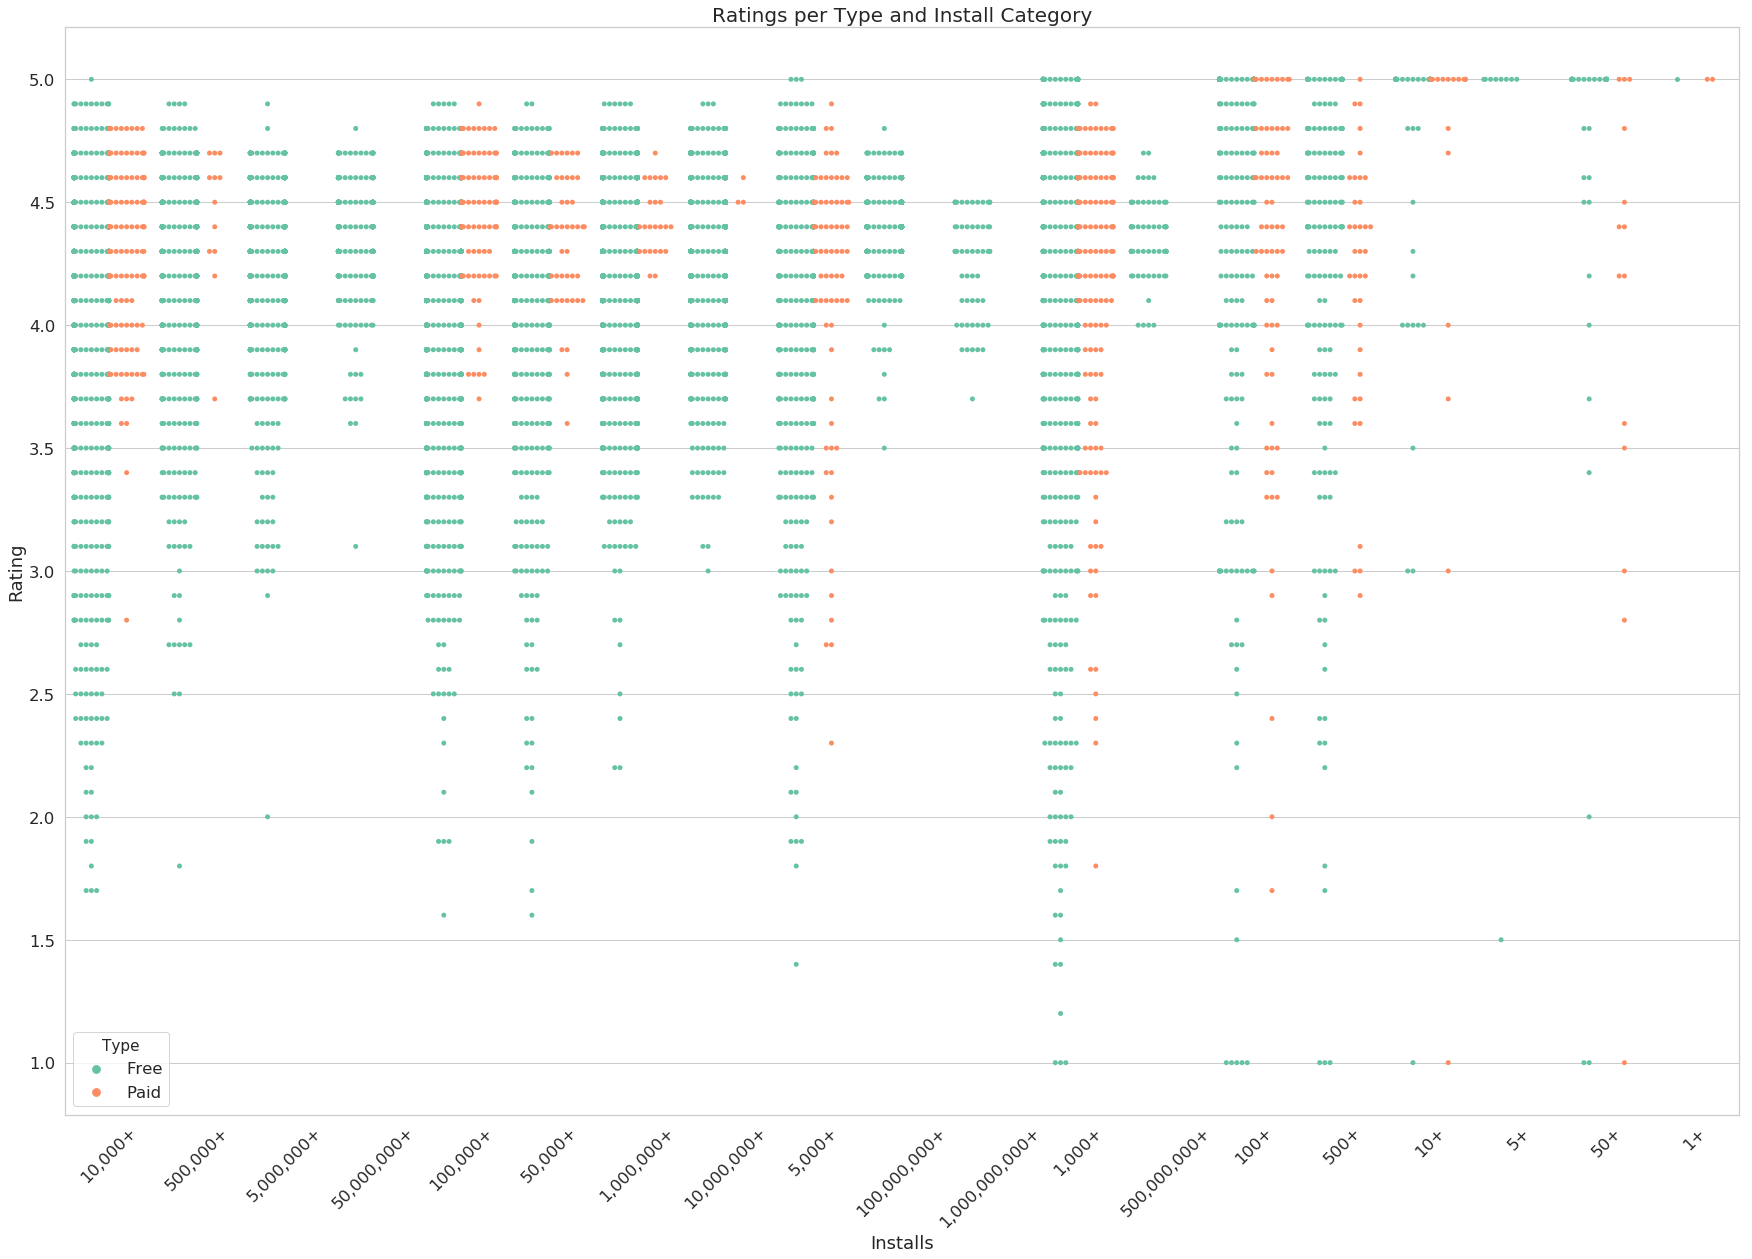

In [17]:
#plot a swarmplot since there are multiple categories (Installs and Type)
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(30,20))
ax = sns.swarmplot(x="Installs", y="Rating", data=df, hue="Type", palette="Set2", dodge=True)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.title("Ratings per Type and Install Category", size=20)

## Rating per Install Category and Type
* Looks like rating is distributed around 4.5 when its categorized per install category
* Google play store have very few paid apps

# 7) What is the percentage of paid and free apps in Play Store?

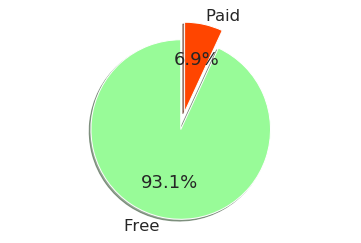

In [18]:
# plot a pie chart
labels = df.Type.unique() #set labels
sizes = [len(df[df.Type == "Free"]), len(df[df.Type == "Paid"])] #count the number of free and paid apps
explode = (0, 0.2) #emphasize "Paid" apps

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["palegreen","orangered"]) #plot pie chart
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() #render plot


# 8) Do we have a correlation between price of the app and rating?

Text(0.5, 1.0, 'Price VS Rating')

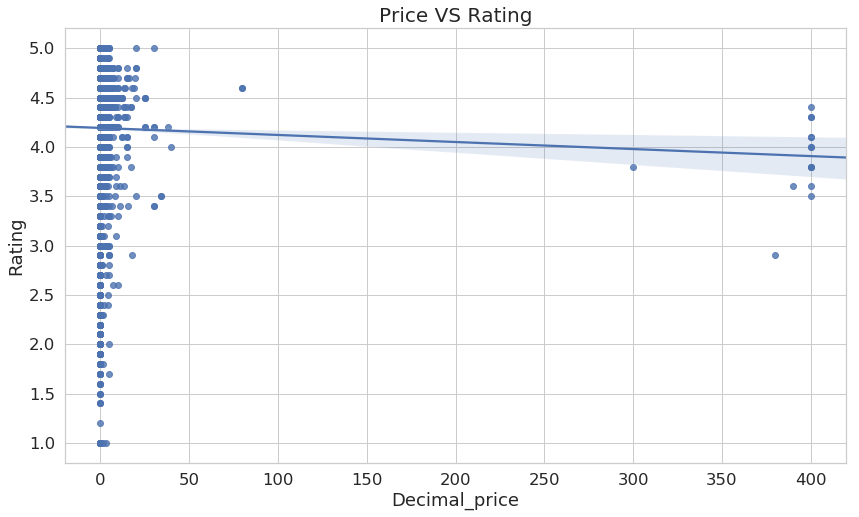

In [19]:
#we are going to plot multiple linear regressions to answer this question
#linear regression looks for the correlation between continuous variables
#price was string so change it to integer

df['Decimal_price'] = df.Price.replace(to_replace = '\$', value='', regex=True)
#add new column and remove special characters

df.Decimal_price = df.Decimal_price.astype('float')
#change to float

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Decimal_price", y="Rating", data=df)
plt.title("Price VS Rating", size=20)

## Price VS Rating
* Yes, as the price increases ratings received seems to decrease even below the average rating in the appstore
* Looks like apps either has a price lower than 100, or price greater than 300

# 9) What if we only look price as a categorical data, does the price-rating correlation change?

Mean price in the dataframe is: 0.9612788461538367


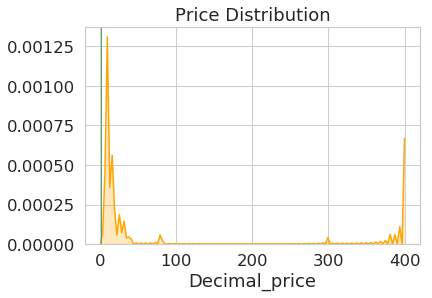

In [20]:
#look at the price distribution to determine price bins
g2 = sns.distplot(df.Decimal_price, hist=False, color="orange", kde_kws={"shade": True})
plt.axvline(x=df.Decimal_price.mean(), c="g", linewidth=1)
plt.title("Price Distribution")
print("Mean price in the dataframe is:", df.Decimal_price.mean())

In [21]:
#price shows a bimodal distribution around 0 and 400 with a right-skew
#we are going to group price data into 10 categories
#I am going to create more categories around 0
def categorize(x):
    if x==0:
        return 0
    if (x > 0) & (x < 0.5):
        return 1
    if (x >= 0.5) & (x < 1):
        return 2
    if (x>=1) &  (x < 2):
        return 3
    if (x>=2) &  (x < 3):
        return 4
    if (x>=3) &  (x < 5):
        return 5
    if (x>=5) &  (x < 10):
        return 6
    if (x>=10) &  (x < 25):
        return 7
    if (x>=25) &  (x < 100):
        return 8
    else:
        return 9

Text(0.5, 1.0, 'Categorical Price VS Rating')

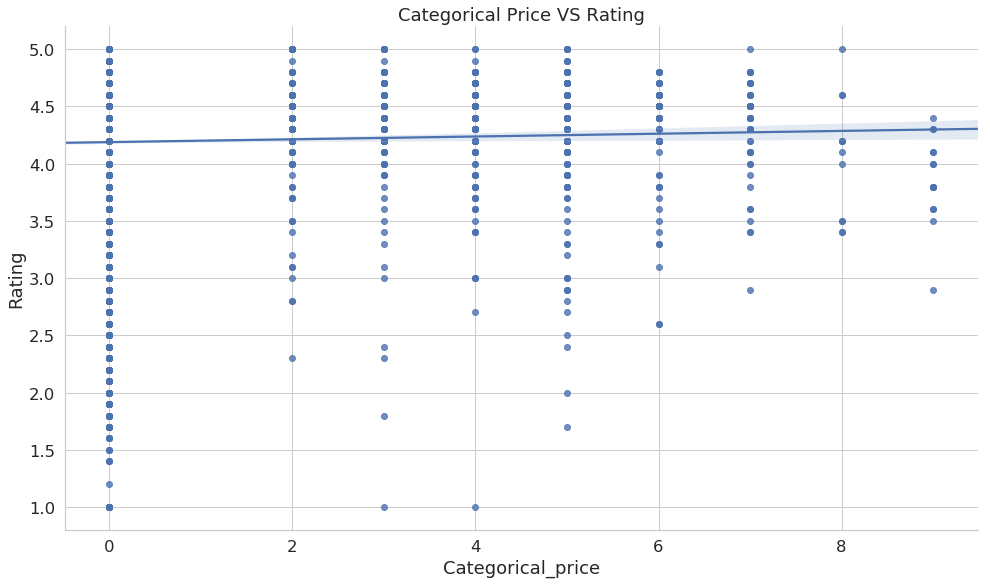

In [22]:
#change price data into categorical data
#plot lmplot since we have changed the data into categorical data
df["Categorical_price"] = df.Decimal_price.apply(categorize)
sns.lmplot(x="Categorical_price", y="Rating", data=df, height=8.27, aspect=14.1/8.27)
plt.title("Categorical Price VS Rating")

## Categorical Price - Rating
When we approach prices with categories, we cannot achieve a signifcant correlation between price and rating

# 10) Does the last update date has an effect on rating?

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object


Text(0.5, 1.0, 'Update Year VS Rating')

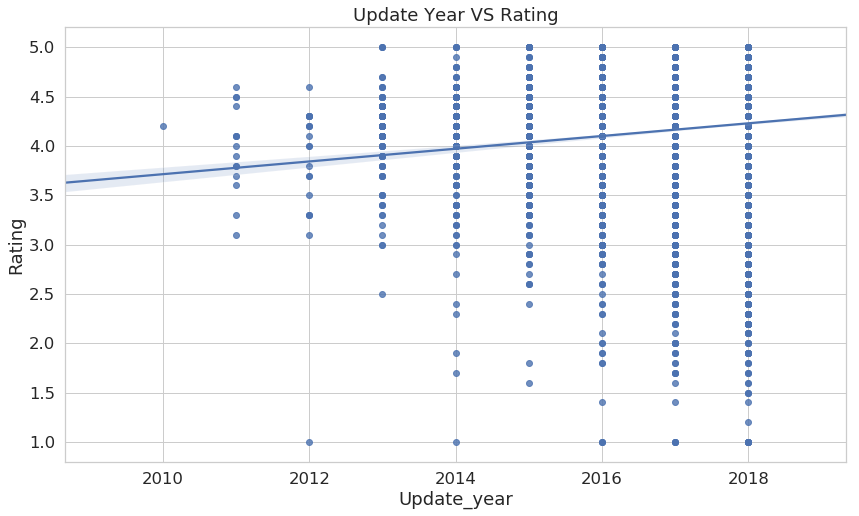

In [23]:
#look at the last updated column
print(df['Last Updated'].head())

#change the date column to a date format from object type
df["Update_date"] = df['Last Updated'].apply(lambda x: dt.strptime(x, '%B %d, %Y').date()) 

#fetch update year from date
df["Update_year"] = df["Update_date"].apply(lambda x: x.strftime('%Y')).astype('int64') 

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Update_year", y="Rating", data=df)
plt.title("Update Year VS Rating")

## Update Year - Rating
looks like as the app gets more recent updates chances of getting a higher rating increases

# 11) Which genres addresses which audience ?

In [24]:
print(len(df.Genres.unique()))
print(df.Genres.unique())
#looks like we have genres and its sub genre seperated by semi colons, format is:
#main_genre; sub_genre

print(df["Content Rating"].unique())
#we have 5 content ratings and one not categorized:
#unrated

115
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educational;Educ

In [25]:
#divide genre columns and clean Content Rating
df["Main_genre"] = df.Genres.apply(lambda x: x.split(";")[0])
df["Sub_genre"] = df.Genres.apply(lambda x: x.split(";")[1] if x.find(";")>0 else "NA")
df["Content Rating"] =df["Content Rating"].replace(to_replace = 'Unrated', value='Everyone', regex=True)

Text(0.5, 1.0, 'Genre and Content Rating')

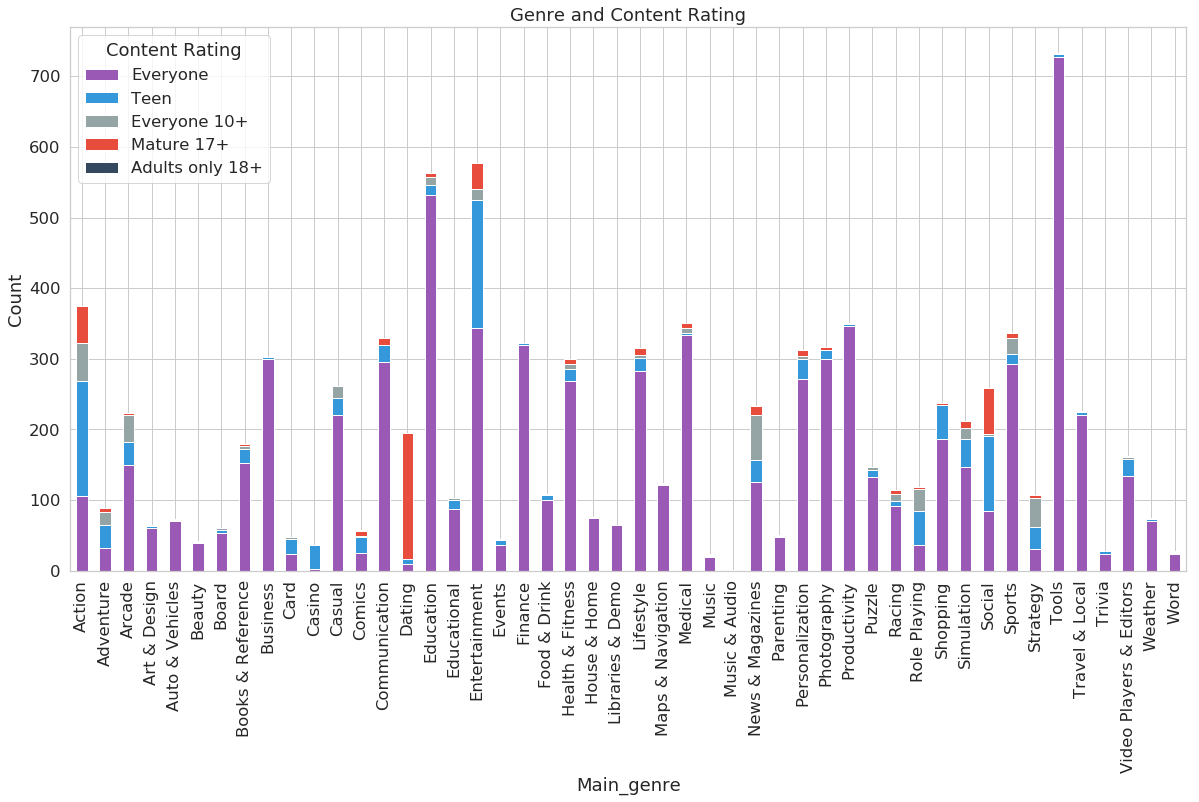

In [26]:
#we are going to look at the data with the stacked bars with pandas dataframe
#create count view per main_genre and content rating
df_by_main_genre = df.groupby(["Main_genre", "Content Rating"]).count().reset_index().sort_values(
    by=["App"], ascending=False).reset_index()

#select relevant columns
df_by_main_genre= df_by_main_genre[["Main_genre", "Content Rating", "App"]]

#reshape data to plot stacked bars
df_pivoted = df_by_main_genre.pivot(columns="Content Rating", index="Main_genre", values="App")
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
df_pivoted.loc[:,df["Content Rating"].unique()].plot.bar(stacked=True, color=colors, figsize=(20,10))
plt.ylabel("Count")
plt.title("Genre and Content Rating")

## App Genre and Audience
* Almost every app genre is for everyone
* But dating apps are for mostly for mature individuals rather than everyone :)
* Actions genre is mostly for Teens


# 12) How sizes per genre differ?

In [27]:
#remember that size column was string object type
print(df.Size.unique())
#sizes differs between KBs and MBs and we have one object column "varies with device"

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M' '6.1M'
 '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.7M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '59M' '9.7M' '78M' '72M' '4

In [28]:
def convert_to_MB(df_column):
    if df_column == "Varies with device":
        result = np.NaN
    elif "k" in df_column:
        result = float(df_column.split("k")[0])*0.001 
    elif "M" in df_column:
        result = float(df_column.split("M")[0]) 
    return result

Text(0.5, 1.0, 'Distribution of App Sizes per Genre')

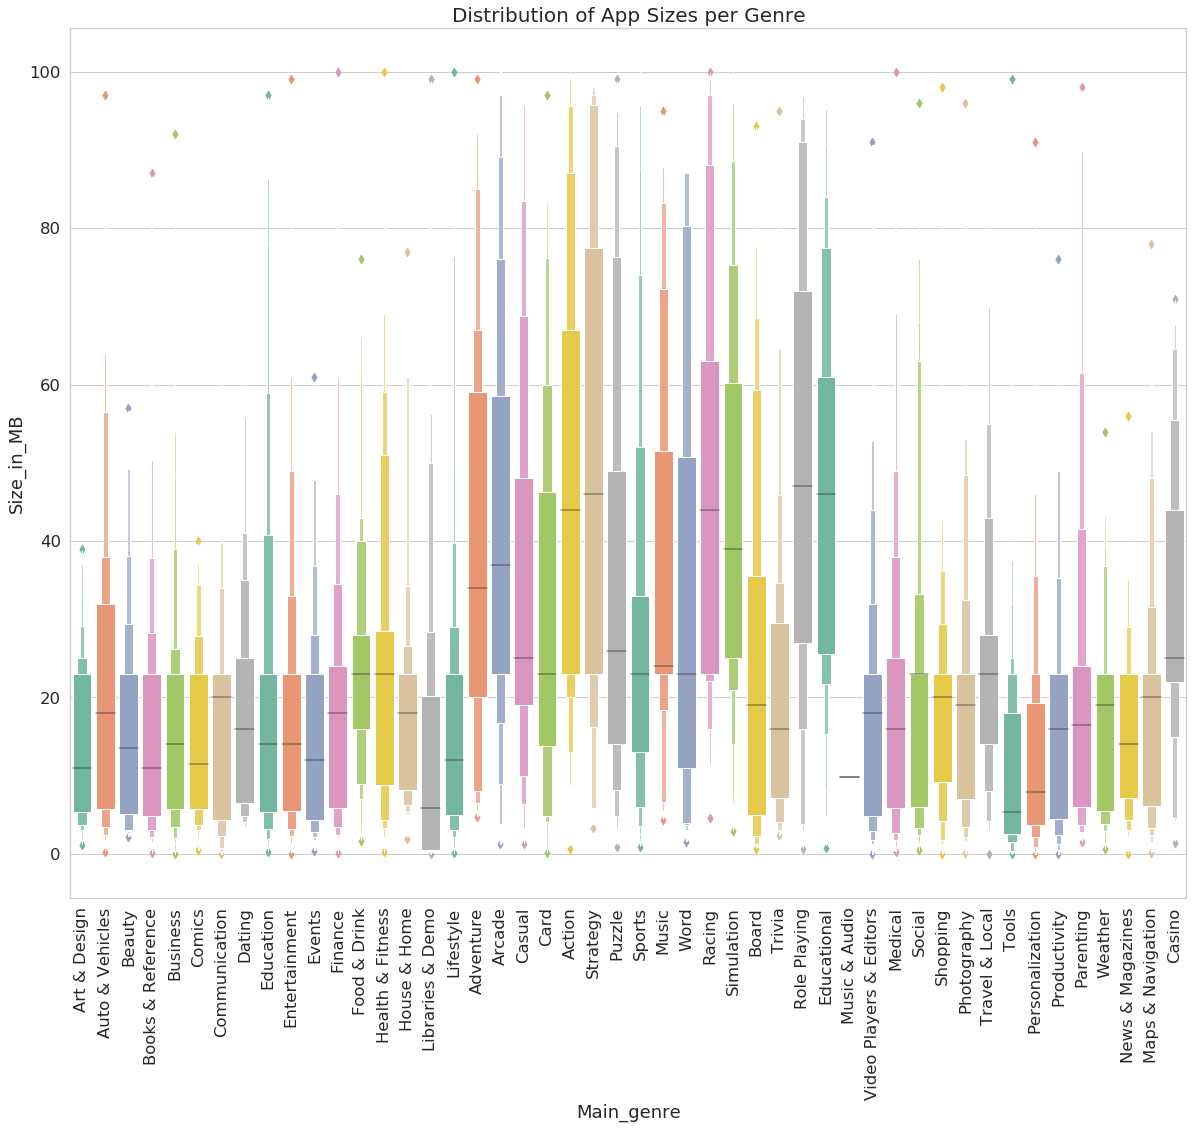

In [29]:
# "varies with device" column will be replaced with NA values for now
# convert every size to MB and float number
#fill NA sizes wtih average size

df["Size_in_MB"]=df.Size.apply(convert_to_MB)
df["Size_in_MB"].fillna(value=df.Size_in_MB.mean(), inplace=True)

#plot boxplot bacause we are interested in the distribution of each app per main genre
fig, ax = plt.subplots(figsize=(20,16))
sns.boxenplot(x='Main_genre', y='Size_in_MB', data=df, palette="Set2")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.title("Distribution of App Sizes per Genre", size=20)


## App Size - Genre

Looks like following genres' apps differs in size in a wider range

* Action
* Strategy
* Role Playing
* Educational
* Strategy